### Try-It Activity 22.2: Sequential Data Models with Keras [2:00:00]

This try-it focuses on using `keras` to build models on sequential data.  This could either be sequential numeric data *or* you can consider text as sequential data.  `keras` contains both preprocessing tools similar to that of the `ImageDataGenerator` for time series and text data.  There are also various layer architectures to choose from including the `LSTM`, `GRU`, and even the `Conv1D`.  Below, you are to select a time series dataset using the `pandas.datareader` functionality or locate a text dataset from an external source to build the network.

**1. Choosing and Preparing the Data**
You can use the pandas_datareader to fetch financial data, such as stock prices, which is a common choice for time series analysis. For example, you might choose to analyze the daily closing prices of a specific stock.

In [ ]:
import pandas as pd
import os
import pandas_datareader.data as pdr
from datetime import datetime

# Define the time period
start_date = datetime(2019, 1, 1)
end_date = datetime(2023, 1, 1)

# Load data
data = pdr.DataReader('AAPL', "av-daily", start=start_date, end=end_date, api_key="XQ6GIGF3QB8V8FBM")
print(data)
# Use closing price
close_prices = data['close']
close_prices

              open      high     low   close    volume
2019-01-02  154.89  158.8500  154.23  157.92  37039737
2019-01-03  143.98  145.7200  142.00  142.19  91312195
2019-01-04  144.53  148.5500  143.80  148.26  58607070
2019-01-07  148.70  148.8300  145.90  147.93  54777764
2019-01-08  149.56  151.8200  148.52  150.75  41025314
...            ...       ...     ...     ...       ...
2022-12-23  130.92  132.4150  129.64  131.86  63814893
2022-12-27  131.38  131.4100  128.72  130.03  69007830
2022-12-28  129.67  131.0275  125.87  126.04  85438391
2022-12-29  127.99  130.4814  127.73  129.61  75703710
2022-12-30  128.41  129.9500  127.43  129.93  77034209

[1008 rows x 5 columns]


,close
2019-01-02,157.92
2019-01-03,142.19
2019-01-04,148.26
2019-01-07,147.93
2019-01-08,150.75
...,...
2022-12-23,131.86
2022-12-27,130.03
2022-12-28,126.04
2022-12-29,129.61


**2. Preprocessing Data**
For LSTM models, you need to transform the data into sequences that represent the inputs and targets (next value predictions).

In [2]:
import numpy as np

def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10  # Number of time steps to look back
X, y = create_sequences(close_prices.values, seq_length)

In [3]:
X

array([[157.92, 142.19, 148.26, ..., 152.29, 150.  , 153.07],
       [142.19, 148.26, 147.93, ..., 150.  , 153.07, 154.94],
       [148.26, 147.93, 150.75, ..., 153.07, 154.94, 155.86],
       ...,
       [144.49, 145.47, 143.21, ..., 135.45, 132.23, 131.86],
       [145.47, 143.21, 136.5 , ..., 132.23, 131.86, 130.03],
       [143.21, 136.5 , 134.51, ..., 131.86, 130.03, 126.04]])

In [4]:
y

array([154.94 , 155.86 , 156.82 , 153.3  , 153.92 , 152.7  , 157.76 ,
       156.3  , 154.68 , 165.25 , 166.44 , 166.52 , 171.25 , 174.18 ,
       174.24 , 170.94 , 170.41 , 169.43 , 170.89 , 170.18 , 170.8  ,
       170.42 , 170.93 , 172.03 , 171.06 , 172.97 , 174.23 , 174.33 ,
       174.87 , 173.15 , 174.97 , 175.85 , 175.53 , 174.52 , 172.5  ,
       172.91 , 178.9  , 180.91 , 181.71 , 183.73 , 186.12 , 188.02 ,
       186.53 , 188.16 , 195.09 , 191.05 , 188.74 , 186.79 , 188.47 ,
       188.72 , 189.95 , 191.24 , 194.02 , 195.35 , 195.69 , 197.   ,
       200.1  , 199.5  , 200.62 , 198.95 , 198.87 , 199.23 , 199.25 ,
       203.13 , 203.86 , 204.53 , 207.48 , 207.16 , 205.28 , 204.3  ,
       204.61 , 200.67 , 210.52 , 209.15 , 211.75 , 208.48 , 202.86 ,
       202.9  , 200.72 , 197.18 , 185.72 , 188.66 , 190.92 , 190.08 ,
       189.   , 183.09 , 186.6  , 182.78 , 179.66 , 178.97 , 178.23 ,
       177.38 , 178.3  , 175.07 , 173.3  , 179.64 , 182.54 , 185.22 ,
       190.15 , 192.

**3. Building the LSTM Model**
Now, you’ll build an LSTM model using Keras. This will involve defining the model architecture and compiling it.

In [5]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Model architecture
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**4. Training the Model**
You can now train the model using the data prepared earlier. Make sure to normalize or standardize your data if needed.

In [6]:
# Reshape data for (Sample, Time Steps, Features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train the model
history = model.fit(X, y, epochs=30, validation_split=0.2, verbose=1)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 67283.8438 - val_loss: 28136.3145
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 52258.8945 - val_loss: 14436.0449
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11283.8457 - val_loss: 31.7067
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 306.1919 - val_loss: 50.0747
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 264.6237 - val_loss: 23.9178
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 409.2148 - val_loss: 50.5902
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 311.2845 - val_loss: 22.4023
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 770.4434 - val_loss: 102.6733
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 279.2648 - val_loss: 63.8901
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 301.8816 - val_loss: 31.5419
Epoch 11/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 258.2942 - val_loss: 20.8541
Epoch 12/30
25/25 ━━━

**5. Evaluation and Comparison**
Finally, you’ll evaluate the LSTM model and compare it with a baseline model, such as a simple moving average or ARIMA.

LSTM Performance: Look at the MSE on test data and plots of predictions against actual values.
Baseline Model: Fit an ARIMA model to the same data and compare the performance.

In [7]:
from sklearn.model_selection import train_test_split

# Assuming you have already defined and created 'X' and 'y' from your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape X_train and X_test if needed (specifically for LSTM input)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model on the training data
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 14427.3535 - val_loss: 517.0874
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1229.4309 - val_loss: 297.5467
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 507.2552 - val_loss: 219.9577
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 412.9840 - val_loss: 192.1547
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 392.1476 - val_loss: 102.7338
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 274.3717 - val_loss: 128.3604
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 93.0319 - val_loss: 102.6186
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 274.4197 - val_loss: 75.6709
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 259.5500 - val_loss: 71.3574
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 615.4630 - val_loss: 75.3225


**6. Visualizing Prediction**
To visualize the performance of your LSTM model, you can plot its predictions against the actual values from the test dataset. This will give you a clear visual representation of how well the model is capturing the trends and fluctuations in the data.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


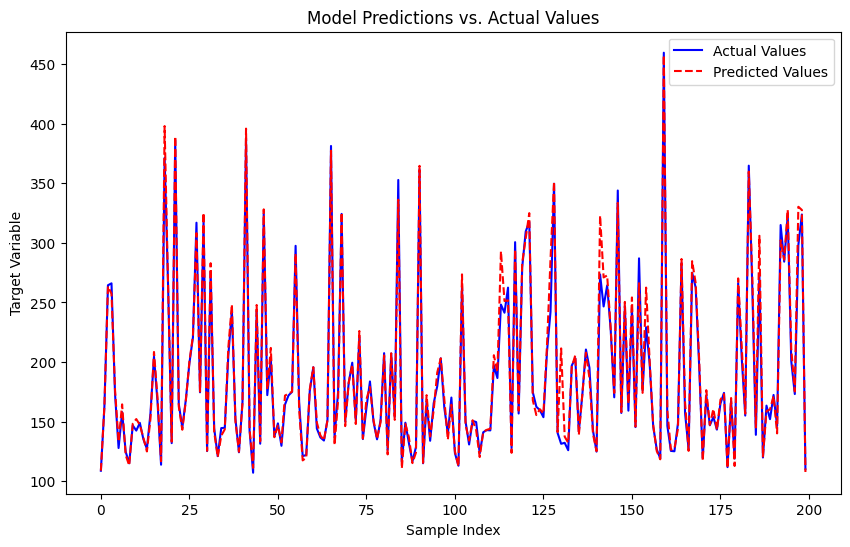

In [11]:
import matplotlib.pyplot as plt

# Make predictions on the test data
test_predictions = model.predict(X_test)
test_predictions = test_predictions.flatten()  # Flatten the array if needed

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(test_predictions, label='Predicted Values', color='red', linestyle='--')
plt.title('Model Predictions vs. Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

In [12]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load your dataset
# df = pd.read_csv('path_to_your_dataset.csv')
# For demonstration, let's assume 'df' has a column 'Close' for closing prices

# Generate random data for demonstration
np.random.seed(0)
df = pd.DataFrame(np.random.randn(1000, 1), columns=['Close'])

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

Transform the data into sequences to be used as input for the LSTM and GRU models.

In [13]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 20
X, y = create_sequences(df_scaled, sequence_length)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# LSTM Model
model_lstm = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# GRU Model
model_gru = Sequential([
    GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model_gru.compile(optimizer='adam', loss='mse')
model_gru.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0841 - val_loss: 0.0345
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0313 - val_loss: 0.0307
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0280 - val_loss: 0.0310
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0294 - val_loss: 0.0309
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0317 - val_loss: 0.0307
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0302 - val_loss: 0.0305
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0316 - val_loss: 0.0307
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0273 - val_loss: 0.0307
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0285 - val_loss: 0.0304
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0274 - val_loss: 0.0303
Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1761 - val_loss: 0.0394
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0345 - val_los

In [16]:
lstm_loss = model_lstm.evaluate(X_test, y_test, verbose=0)
gru_loss = model_gru.evaluate(X_test, y_test, verbose=0)

print("LSTM Test Loss:", lstm_loss)
print("GRU Test Loss:", gru_loss)

LSTM Test Loss: 0.032463960349559784
GRU Test Loss: 0.03301570191979408


**Conclusion**
Based on the losses from both models, you can make a comparative analysis regarding their performance on your dataset. Typically, you'd also look at other metrics like accuracy, or for a regression task like this, you might look at mean squared error (MSE) or root mean squared error (RMSE) on real data.

In [17]:
# Predictions
lstm_predictions = model_lstm.predict(X_test).flatten()
gru_predictions = model_gru.predict(X_test).flatten()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [18]:
lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1)).flatten()
gru_predictions = scaler.inverse_transform(gru_predictions.reshape(-1, 1)).flatten()
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

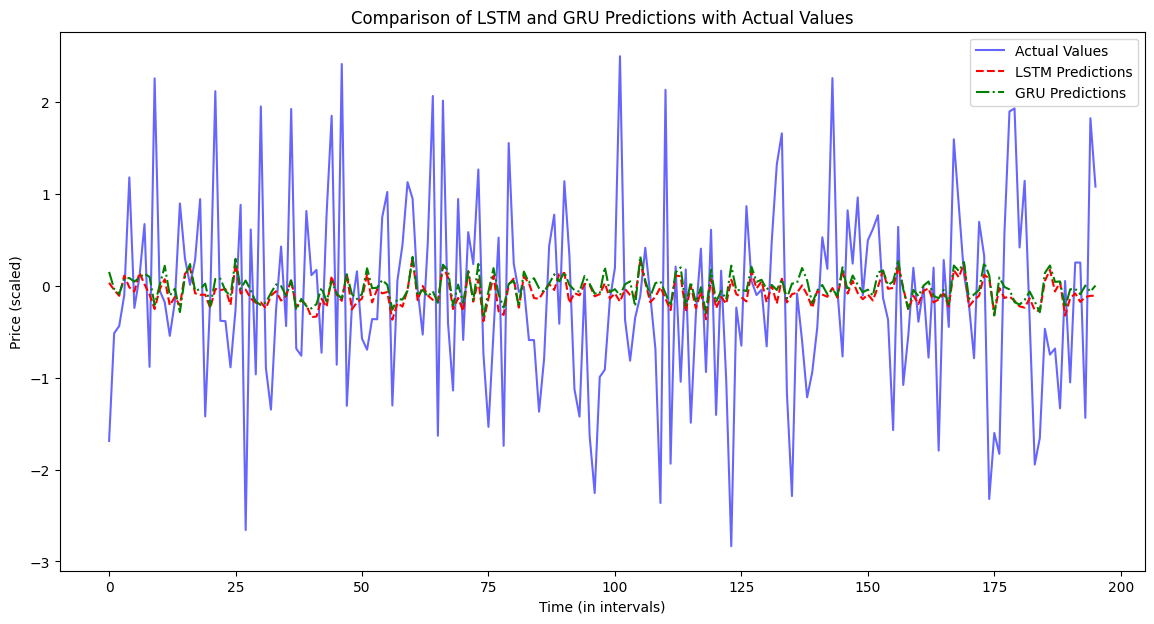

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(y_test_rescaled, label='Actual Values', color='blue', alpha=0.6)
plt.plot(lstm_predictions, label='LSTM Predictions', color='red', linestyle='--')
plt.plot(gru_predictions, label='GRU Predictions', color='green', linestyle='-.')
plt.title('Comparison of LSTM and GRU Predictions with Actual Values')
plt.xlabel('Time (in intervals)')
plt.ylabel('Price (scaled)')
plt.legend()
plt.show()